#### **Import modules**

In [2]:
from typing import List

import pandas as pd
import seaborn as sns
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from sklearn.decomposition import PCA

from utils import GeorgianWord2VecModel, GeorgianFastTextModel

#### **Init word2vec model**

In [5]:
texts = [["გამარჯობა", "როგორ", "ხარ?"], ["რავი", "კარგად", "შენ?"]]

model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4, epochs=6)

model.save("word2vec.model")

## **Convert file into input format**

word2vec model gets list of list of strings as an input

In [6]:
def convert_file_into_input(file_path: str) -> List[List[str]]:
    with open(file_path, 'r') as f:
        data = f.read()

    sentences = sent_tokenize(data)
    print(sentences)
    return [[word.strip() for word in sentence.split(" ")] for sentence in sentences]

In [7]:
data = convert_file_into_input("../data/data2.txt")

['ედუარდ შევარდნაძე \nედუარდ ამბროსის ძე შევარდნაძე (დ.', '25 იანვარი, 1928, სოფელი მამათი, ოზურგეთის მაზრა, საქართველოს სსრ — გ.', '7 ივლისი, 2014, თბილისი, საქართველო) — ქართველი პოლიტიკოსი და სახელმწიფო მოღვაწე.', '1972-1985 წლებში საქართველოს სსრ-ის კომპარტიის ცკ-ს პირველი მდივანი, 1985-1990 წლებში საბჭოთა კავშირის საგარეო საქმეთა მინისტრი, 1995–2003 წლებში საქართველოს პრეზიდენტი.', 'იყო სსრკ-ის IX-XI მოწვევების უმაღლესი საბჭოს დეპუტატი.', 'სოციალისტური შრომის გმირი (1981), სკკპ ცკ-ის პოლიტბიუროს წევრობის კანდიდატი (1978), წევრი 1985 წლის ივლისიდან.', '1964–1965 წლებში იყო საზოგადოებრივი წესრიგის დაცვის მინისტრის მოადგილე.', '1965–1972 წლებში საქართველოს სსრ შინაგან საქმეთა მინისტრი.', '1985 წელს შევარდნაძე სსრკ-ის საგარეო საქმეთა მინისტრად დაინიშნა.', '1990 წელს იგი გადადგა.', '1991 წელს მიხეილ გორბაჩოვის მიწვევით კვლავ დაუბრუნდა მინისტრის პოსტს.', '1992 წელს საქართველოს სახელმწიფო საბჭოს ხელმძღვანელი, 1992–1995 წლებში საქართველოს რესპუბლიკის პარლამენტის თავმჯდომარე.', 'მონაწილეობ

### Create and test GeorgianWord2VecModel

In [6]:
word2vec_model = GeorgianWord2VecModel(load=True)

Initializing data
Model created!


In [5]:
word2vec_model.train("../data/data_115000.txt")

In [7]:
word2vec_model.get_vector("ედუარდ")

array([-8.02803338e-02,  1.67308226e-01,  3.98224533e-01, -1.05134577e-01,
        4.05255735e-01,  4.65376563e-02, -1.85555935e-01,  5.24742305e-01,
       -5.37458122e-01,  1.12195753e-01, -6.42238736e-01, -7.59889603e-01,
        7.16857165e-02,  3.20877314e-01,  5.07330596e-01,  1.56617835e-01,
       -1.63945496e-01, -7.14882910e-01,  9.08270925e-02,  2.06224889e-01,
       -3.02477837e-01,  2.01856241e-01, -6.44058213e-02, -1.78284958e-01,
        3.23946238e-01, -5.12323342e-02, -8.18671212e-02, -1.83416262e-01,
       -1.03111655e-01, -5.49386740e-01,  1.40148252e-01,  7.89590478e-02,
       -1.70797244e-01, -3.04383468e-02, -4.99808379e-02, -3.65637094e-01,
       -2.46571943e-01,  1.92276031e-01,  7.83616037e-04, -2.82852232e-01,
       -3.11648011e-01,  8.94598886e-02, -2.15301424e-01,  2.01605305e-01,
       -2.99149871e-01, -5.53199828e-01, -5.17970562e-01,  4.85748768e-01,
        2.21888110e-01, -7.43748397e-02, -7.32209235e-02, -2.64157444e-01,
       -2.70196050e-01, -

### სინონიმების ჯგუფების კლასტერიზაცია

___



In [ ]:
model = word2vec_model.get_model()

In [5]:

def get_df_from_model(model: Word2Vec, export_words: List[str]) -> pd.DataFrame:
    vectors = model.wv.vectors
    words = model.wv.index_to_key
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    words = pd.DataFrame(words)
    pca_result = pd.DataFrame(pca_result)
    pca_result['x_values'] = pca_result.iloc[0:, 0]
    pca_result['y_values'] = pca_result.iloc[0:, 1]
    pca_final = pd.merge(words, pca_result, left_index=True, right_index=True)
    pca_final['word'] = pca_final.iloc[0:, 0]
    result = pca_final[['word', 'x_values', 'y_values']]

    result = result.sample(frac=1)
    result = result.loc[
        result['word'].isin(export_words)]
    return result.head(9)


In [17]:

export_words_list = ["ბევრი", "მრავალი", "მამა", "დედა", "შოკოლადი", "სანუკვარი", "ნანატრი", "ტკბილეული"]
pca_data = get_df_from_model(model, export_words_list)

pca_data

,word,x_values,y_values
166,მამა,4.910019,0.472511
73278,ტკბილეული,-0.145024,-0.030723
197263,ნანატრი,-0.177516,0.031994
49608,სანუკვარი,-0.091728,-0.021977
4539,ბევრი,7.961963,-2.887803
115088,შოკოლადი,-0.160788,0.002933
3738,მრავალი,8.943891,-2.726403
175,დედა,3.736048,0.696321


In [3]:
def get_graph(pca_data: pd.DataFrame) -> None:
    fig = sns.lmplot(x='x_values', y='y_values',
                     data=pca_data,
                     fit_reg=False,
                     legend=True,
                     hue='word')

    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    plt.show()

### პატარა მონაცემებზე

Initializing data
Model created!


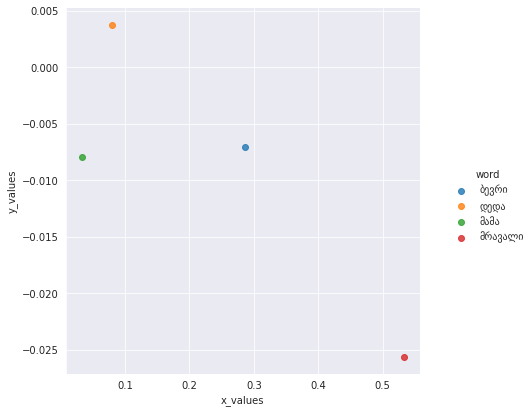

In [7]:
word2vec_small_data_model = GeorgianWord2VecModel()
word2vec_small_data_model.train("../data/data3.txt")

export_words_list = ["ბევრი", "მრავალი", "მამა", "დედა", "შოკოლადი", "სანუკვარი", "ნანატრი", "ტკბილეული"]

pca_data = get_df_from_model(word2vec_small_data_model.get_model(), export_words_list)

get_graph(pca_data)

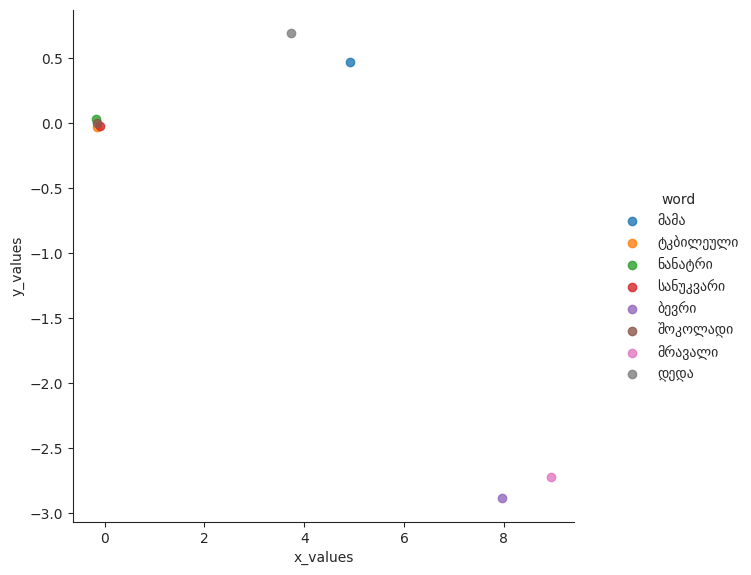

In [20]:
sns.set_style('ticks')

get_graph(pca_data)

### არსებითი სახელის ბრუნვა

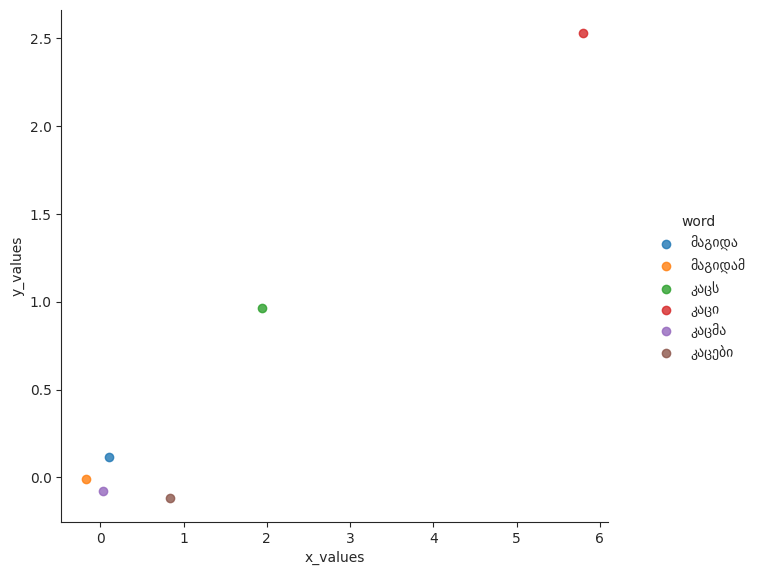

In [21]:
export_words_list = ["კაცი", "კაცმა", "კაცს", "კაცები", "მაგიდა", "მაგიდამ"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

### ანტონიმთა ჯგუფების კლასტერიზაცია

---

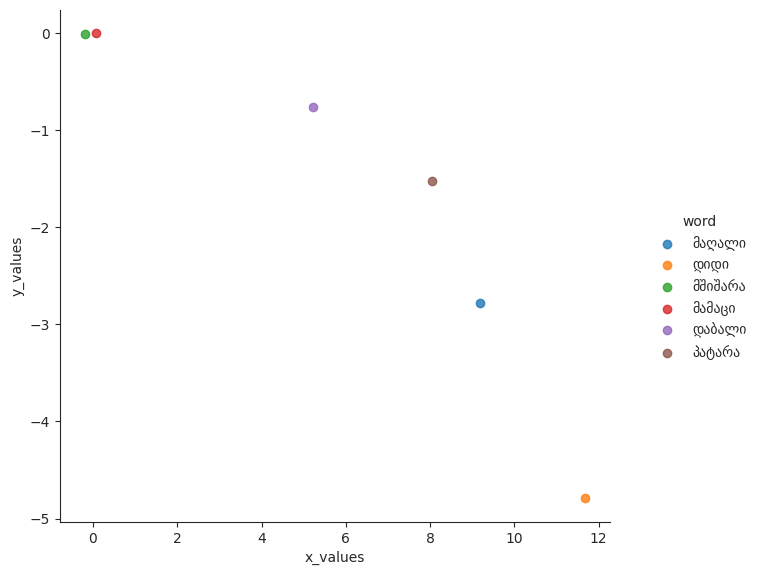

In [24]:
export_words_list = ["მაღალი", "დაბალი", "მამაცი", "მშიშარა", "დიდი", "პატარა"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

### საკუთარი სახელების კლასტერიზაცია

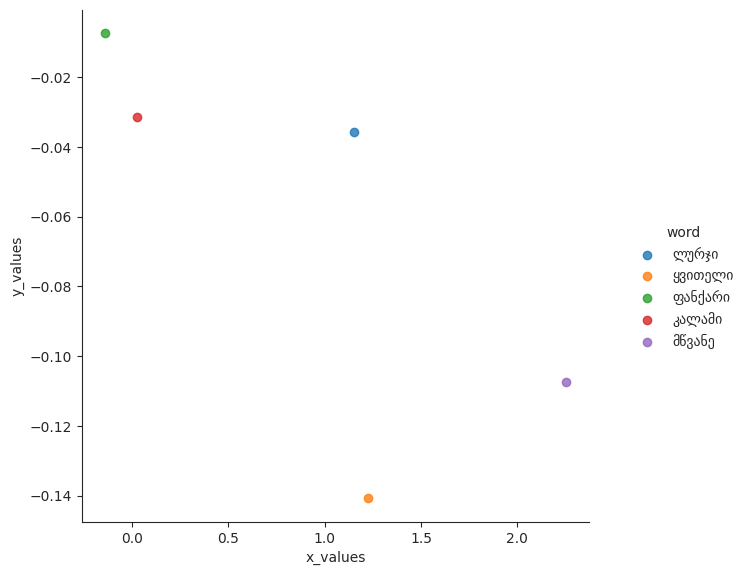

In [29]:
export_words_list = ["ლურჯი", "~", "ყვითელი", "ფანქარი", "კალამი"]

pca_data = get_df_from_model(model, export_words_list)

get_graph(pca_data)

In [9]:
fasttext_model = GeorgianFastTextModel()
fasttext_model.train("../data/data_115000.txt")


Initializing data
Model created!


In [17]:
export_words_list = ["კაცი", "კაცმა", "კაცს", "მდინარე", "მდინარენი"]

pca_data = get_df_from_model(fasttext_model.get_model(), export_words_list)

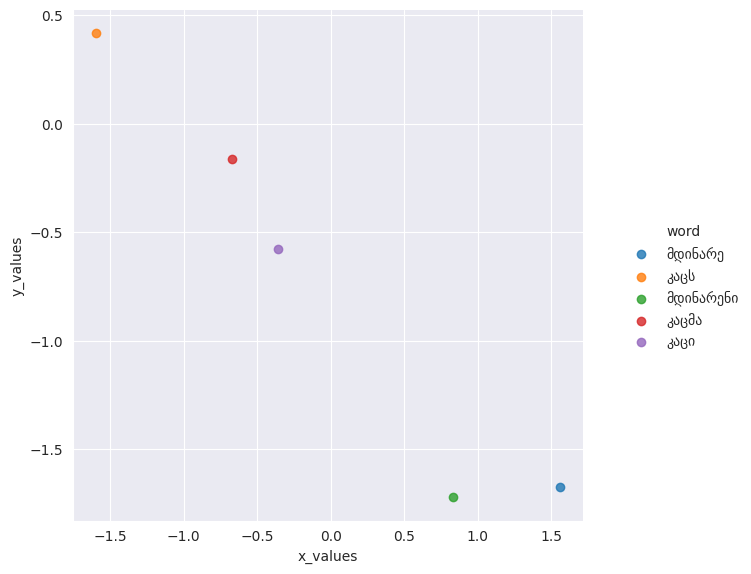

In [18]:
get_graph(pca_data)

In [15]:
model = fasttext_model.get_model()

model.wv.get_vector("rame_jandaba")

array([ 6.5449026e-04,  1.3997619e-03,  3.5183609e-04, -1.2912027e-03,
        5.2582647e-04, -8.8980794e-04,  1.1477305e-03, -1.9915018e-03,
        4.3083378e-04,  6.8961352e-04,  2.3012550e-04, -6.5838749e-04,
       -1.7117325e-04, -1.1588782e-03, -1.0086633e-03,  2.0254722e-04,
       -9.5512613e-04,  5.4069707e-04,  3.1220398e-04,  1.3538586e-03,
       -3.9063752e-04,  4.2921416e-05,  2.0046860e-03,  4.7424878e-04,
        8.0862541e-05, -7.0861791e-04,  4.1791203e-04,  1.8858258e-04,
       -3.3784981e-04, -4.2989547e-04, -1.5377051e-04,  2.6175965e-04,
        1.1330800e-03, -8.9291803e-05, -6.2411919e-04,  3.8202963e-04,
       -7.3365250e-04,  1.3935426e-03,  2.5811468e-04,  3.6054083e-05,
       -1.5469489e-04,  3.9627624e-04, -1.6115201e-04, -9.5334479e-05,
        9.5187640e-04,  4.2028827e-04, -1.0755451e-03, -1.2869716e-03,
        4.3406626e-04,  8.8715582e-04,  6.2966417e-04,  4.7967132e-04,
       -5.9750286e-04, -4.4536812e-04,  1.1998104e-03,  2.7028614e-04,
      